In [1]:
import os
import sys
import math
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib notebook
sys.path.append("lib") # go to parent dir
import pickle

import subprocess
import nibabel
import PIL.Image as Image

import lib.motion as motion
import lib.head_motion
import lib.models as models

W1114 16:09:14.135680 140104876013312 deprecation_wrapper.py:119] From /data/vision/polina/scratch/nmsingh/dev/Motion-Experiments/lib/models.py:4: The name tf.keras.layers.CuDNNGRU is deprecated. Please use tf.compat.v1.keras.layers.CuDNNGRU instead.

W1114 16:09:14.136790 140104876013312 deprecation_wrapper.py:119] From /data/vision/polina/scratch/nmsingh/dev/Motion-Experiments/lib/models.py:4: The name tf.keras.layers.CuDNNLSTM is deprecated. Please use tf.compat.v1.keras.layers.CuDNNLSTM instead.

Using TensorFlow backend.


In [2]:
img_dir = '/data/vision/polina/scratch/nmsingh/ADNI-data/uncropped/adni-split-by-subj-slice128-axial/train/origs/'
imgs = os.listdir(img_dir)
img = np.load(img_dir+imgs[0])
img = np.rot90(img['vol_data'])

(-0.5, 255.5, 255.5, -0.5)

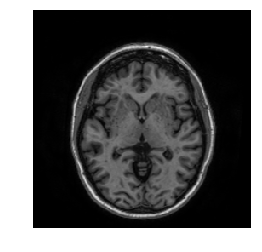

In [3]:
plt.figure()
plt.imshow(img,cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

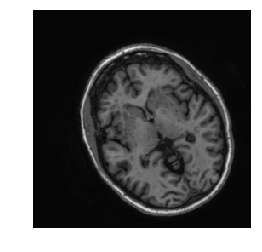

In [4]:
num_pix = np.zeros((256,2))
k_line = 32
num_pix[k_line:,0] = np.random.random()*20-10
num_pix[k_line:,1] = np.random.random()*20-10
angle = np.zeros(256)
angle[k_line:] = np.random.random()*90-45
plt.figure()
plt.imshow(np.real(lib.motion.add_rotation_and_translation(img,angle,num_pix,return_k=False)[0]),cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

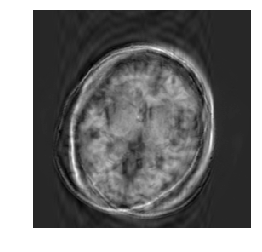

In [5]:
n = 256
num_move_lines=4
move_inds = random.sample(range(1,n),num_move_lines)
move_inds.sort()
move_ends = move_inds.copy()
move_ends.extend([None])
k_vect = np.zeros(n)
num_pix = np.zeros((n,2))
angle = np.zeros(n)

for i in range(len(move_inds)):
    k_vect[move_inds[i]] = 1
    num_pix[move_ends[i]:move_ends[i+1],0] = np.random.random()*20-10
    num_pix[move_ends[i]:move_ends[i+1],1] = np.random.random()*20-10
    angle[move_ends[i]:move_ends[i+1]] = np.random.random()*90-45    

plt.figure()
plt.imshow(np.real(lib.motion.add_rotation_and_translation(img,angle,num_pix,return_k=False)[0]),cmap='gray')
plt.axis('off')